In [70]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split


In [71]:
df = pd.read_csv('used_cars_data.csv')
df.info()
df_temp2=df.copy()
df_temp=df.copy()

df.head(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,7.63,1.95


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.00,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


In [300]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [17]:
df.dtypes
#SOME DATATYPES WITH INT, OBJECT AND FLOAT WHICH ARE CONVERT TO FLOAT IN FUTURE CODE

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [358]:
df.isna().sum()
##LOOKS LIKE THERE ARE SOME NULL VALUES WHICH WE REMOVE IN FUTURE CODE

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                46
Power                175
Seats                  0
New_Price              0
Price                  0
dtype: int64

In [13]:
a=df.duplicated()
print(a==True)

##LOOKS LIKE NO DUPLICATES

0       False
1       False
2       False
3       False
4       False
        ...  
7248    False
7249    False
7250    False
7251    False
7252    False
Length: 7253, dtype: bool


In [20]:
pd.crosstab(df_temp['Mileage'],df_temp['Fuel_Type'])

Fuel_Type,CNG,Diesel,LPG,Petrol
Mileage,,,,
0.0 kmpl,0,31,0,50
10.0 kmpl,0,8,0,5
10.1 kmpl,0,0,0,10
10.13 kmpl,0,0,0,4
10.2 kmpl,0,3,0,6
...,...,...,...,...
9.52 kmpl,0,2,0,0
9.7 kmpl,0,0,0,1
9.74 kmpl,0,0,0,4


In [22]:
#sns.boxplot(x="Fuel_Type",y="Mileage",data=df_temp)
for i in df["Mileage"]:
    a=i.split(" ",1)
    
    #b=a.split(" ",1)
    print(a)
    
    
##SPLITTING MILEAGE COLUMNS IN UNITS AND NUMBERS

['26.6', 'km/kg']
['19.67', 'kmpl']
['18.2', 'kmpl']
['20.77', 'kmpl']
['15.2', 'kmpl']
['21.1', 'km/kg']
['23.08', 'kmpl']
['11.36', 'kmpl']
['20.54', 'kmpl']
['22.3', 'kmpl']
['21.56', 'kmpl']
['16.8', 'kmpl']
['25.2', 'kmpl']
['12.7', 'kmpl']
['0.0', 'kmpl']
['13.5', 'kmpl']
['25.8', 'kmpl']
['28.4', 'kmpl']
['20.45', 'kmpl']
['14.84', 'kmpl']
['22.69', 'kmpl']
['23.65', 'kmpl']
['13.53', 'kmpl']
['18.5', 'kmpl']
['14.4', 'kmpl']
['16.8', 'kmpl']
['23.08', 'kmpl']
['20.92', 'kmpl']
['17.5', 'kmpl']
['12.8', 'kmpl']
['19.01', 'kmpl']
['14.53', 'kmpl']
['11.18', 'kmpl']
['12.4', 'kmpl']
['16.09', 'kmpl']
['14.0', 'kmpl']
['24.3', 'kmpl']
['18.15', 'kmpl']
['11.74', 'kmpl']
['22.07', 'kmpl']
['19.7', 'kmpl']
['25.4', 'kmpl']
['25.32', 'kmpl']
['18.5', 'kmpl']
['14.62', 'kmpl']
['14.28', 'kmpl']
['14.9', 'kmpl']
['11.25', 'kmpl']
['24.4', 'kmpl']
['16.55', 'kmpl']
['17.11', 'kmpl']
['22.9', 'kmpl']
['17.8', 'kmpl']
['28.4', 'kmpl']
['18.9', 'kmpl']
['15.04', 'kmpl']
['25.17', 'kmpl']
['

AttributeError: 'float' object has no attribute 'split'

In [23]:
df_temp['Mileage']=df_temp['Mileage'].str.replace('[k,m,p,l,/,g, ]','')
df_temp['Engine']=df_temp['Engine'].str.replace('[CC, ]','')
df_temp['Power']=df_temp['Power'].str.replace('[bhp, ]','')

df_temp
##Extracting  numeric values from ‘Engine’, ‘Power’ and ‘New_Price’. Check for variation in their units and
#drop the units if necessary

C:\Users\91866\AppData\Local\Temp\ipykernel_37392\1403229149.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_temp['Mileage']=df_temp['Mileage'].str.replace('[k,m,p,l,/,g, ]','')
C:\Users\91866\AppData\Local\Temp\ipykernel_37392\1403229149.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_temp['Engine']=df_temp['Engine'].str.replace('[CC, ]','')
C:\Users\91866\AppData\Local\Temp\ipykernel_37392\1403229149.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_temp['Power']=df_temp['Power'].str.replace('[bhp, ]','')


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,10.15,NaN


In [24]:
a=""
print(a)
b=[]
temp=0
df["Name"]
for i in df["Name"]:
    a=i.split(" ",2)
    
    #b=a.split(" ",1)
    print(a)

##EXTRACTING CAR BRAND NAME AND MODEL NAME


['Maruti', 'Wagon', 'R LXI CNG']
['Hyundai', 'Creta', '1.6 CRDi SX Option']
['Honda', 'Jazz', 'V']
['Maruti', 'Ertiga', 'VDI']
['Audi', 'A4', 'New 2.0 TDI Multitronic']
['Hyundai', 'EON', 'LPG Era Plus Option']
['Nissan', 'Micra', 'Diesel XV']
['Toyota', 'Innova', 'Crysta 2.8 GX AT 8S']
['Volkswagen', 'Vento', 'Diesel Comfortline']
['Tata', 'Indica', 'Vista Quadrajet LS']
['Maruti', 'Ciaz', 'Zeta']
['Honda', 'City', '1.5 V AT Sunroof']
['Maruti', 'Swift', 'VDI BSIV']
['Land', 'Rover', 'Range Rover 2.2L Pure']
['Land', 'Rover', 'Freelander 2 TD4 SE']
['Mitsubishi', 'Pajero', 'Sport 4X4']
['Honda', 'Amaze', 'S i-Dtech']
['Maruti', 'Swift', 'DDiS VDI']
['Renault', 'Duster', '85PS Diesel RxL Plus']
['Mercedes-Benz', 'New', 'C-Class C 220 CDI BE Avantgare']
['BMW', '3', 'Series 320d']
['Maruti', 'S', 'Cross DDiS 200 Alpha']
['Audi', 'A6', '2011-2015 35 TFSI Technology']
['Hyundai', 'i20', '1.2 Magna']
['Volkswagen', 'Vento', 'Petrol Highline AT']
['Honda', 'City', 'Corporate Edition']
['Ni

In [302]:
df[["Price","Kilometers_Driven"]]
df['price_log'] = np.log(df['Price'])
df['kilometers_driven_log'] = np.log(df['Kilometers_Driven'])
df[["Price","Kilometers_Driven","price_log","kilometers_driven_log"]]


##CREATING LOG VARIABLES OF PRICE AND KILOMETERS DRIVEN

,Price,Kilometers_Driven,price_log,kilometers_driven_log
0,1.75,72000,0.559616,11.184421
1,12.50,41000,2.525729,10.621327
2,4.50,46000,1.504077,10.736397
3,6.00,87000,1.791759,11.373663
4,17.74,40670,2.875822,10.613246
...,...,...,...,...
7248,NaN,89411,NaN,11.400999
7249,NaN,59000,NaN,10.985293
7250,NaN,28000,NaN,10.239960
7251,NaN,52262,NaN,10.864025


In [25]:
# replace the missing values with median value
df_temp = df_temp.fillna(df_temp.median())

C:\Users\91866\AppData\Local\Temp\ipykernel_37392\1962665164.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_temp = df_temp.fillna(df_temp.median())


In [26]:
df_temp.isna().sum()

##REPLACING NULL VALUES WITH MEDIAN VALUES

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [27]:
df_temp.describe().T

## 5 POINT SUMMARY   min 	25% 	50% 	75% 	max

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.00,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7253.0,5.277678,0.809039,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,7253.0,8.826235,10.293313,0.44,3.85,5.64,8.40,160.0


In [377]:
#Observe if there’s any relationship between the units given in the mileage column and the Fuel_Type.

df_temp = df_temp.astype({'Mileage':'float','Engine':'float','Power':'float','Kilometers_Driven':'float','Year':'float'})
df_temp.describe()
df_temp.info()
#df_temp.plot(x="Mileage", y="Fuel_Type", kind="bar")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   float64
 4   Kilometers_Driven  7253 non-null   float64
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 793.4+ KB


In [72]:
# replace the missing values with median value
df_temp = df_temp.fillna(df_temp.median())


C:\Users\91866\AppData\Local\Temp\ipykernel_37392\66596589.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_temp = df_temp.fillna(df_temp.median())


In [73]:
df_temp.isna().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                46
Power                175
Seats                  0
New_Price              0
Price                  0
dtype: int64

In [28]:
df_temp.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [33]:
df2 = df.groupby('New_Price')['Name'].apply(list)
print(df2)

df4= df.apply(lambda x: x.Owner_Type != 'First', axis = 1)
df4


New_Price
3.91      [Maruti Alto K10 LXI, Maruti Alto K10 LXI, Mar...
3.95                   [Renault KWID RXL, Renault KWID RXL]
3.96                   [Renault KWID RXL, Renault KWID RXL]
3.98                                     [Datsun redi-GO T]
3.99             [Maruti Alto LXI, Datsun redi-GO T Option]
                                ...                        
160.00                   [Land Rover Range Rover Sport HSE]
166.00      [BMW 7 Series 730Ld Design Pure Excellence CBU]
171.00    [Mercedes-Benz S-Class 320 L, Mercedes-Benz S-...
230.00        [Land Rover Range Rover 3.0 Diesel LWB Vogue]
375.00    [Bentley Continental Flying Spur, Bentley Flyi...
Name: Name, Length: 643, dtype: object


0       False
1       False
2       False
3       False
4        True
        ...  
7248    False
7249    False
7250    False
7251     True
7252    False
Length: 7253, dtype: bool

In [36]:
#df.groupby(["Owner_Type", "Name"], as_index=False)[["Price"]].sum()
dfdumuy=df.groupby(["Owner_Type", "Name"])[["New_Price"]].sum().reset_index()
dfdumuy.head(25)


,Owner_Type,Name,New_Price
0,First,Audi A3 35 TDI Attraction,85.78
1,First,Audi A3 35 TDI Premium,42.89
2,First,Audi A3 35 TDI Premium Plus,85.78
3,First,Audi A4 1.8 TFSI,106.28
4,First,Audi A4 1.8 TFSI Technology Edition,53.14
5,First,Audi A4 2.0 TDI,850.24
6,First,Audi A4 2.0 TDI 177 Bhp Premium Plus,690.82
7,First,Audi A4 2.0 TDI 177 Bhp Technology Edition,159.42
8,First,Audi A4 2.0 TDI Multitronic,478.26
9,First,Audi A4 2.0 TDI Premium Sport Limited Edition,159.42


In [37]:
pd.crosstab(df['Owner_Type'],df['Price'])

##AVERAGE OF USED CAR PRICES BY BRAND

Price,0.44,0.45,0.50,0.51,0.53,0.55,0.60,0.63,0.65,0.69,...,79.00,83.96,85.00,90.00,93.00,93.67,97.07,100.00,120.00,160.00
Owner_Type,,,,,,,,,,,,,,,,,,,,,
First,0,0,2,1,0,1,1,0,1,0,...,2,1,1,0,1,1,1,1,0,1
Fourth & Above,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Second,1,2,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
Third,0,1,0,0,1,2,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,1,...,0,0,0,0,0,0,0,0,1,0
1,1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,0,...,0,0,0,0,0,0,0,0,0,1
2,2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,0,...,0,1,0,0,0,0,0,0,0,0
3,3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,0,...,0,1,0,0,0,0,0,0,0,0
4,4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,0,...,0,0,1,0,0,0,0,0,0,0
5,5,2012,75000,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35,0,...,0,0,0,0,1,0,0,0,0,0
6,6,2013,86999,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,3.50,0,...,0,0,0,0,0,1,0,0,0,0
7,7,2016,36000,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50,0,...,0,0,0,0,0,0,0,0,1,0
8,8,2013,64430,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.20,0,...,0,0,0,0,0,0,0,0,0,1
9,9,2012,65932,22.3 kmpl,1248 CC,74 bhp,5.0,7.63,1.95,0,...,0,1,0,0,0,0,0,0,0,0



BELOW ARE UNIVARIATE AND BIVARIATE AND  MULTIVARIATE ANALYSIS




FUEL TYPE DIESEL IS 53% AND PETROL 45%




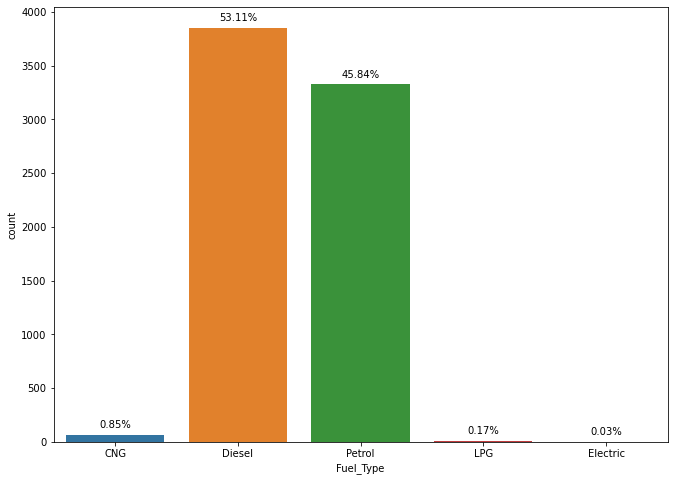

In [74]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(df_temp['Fuel_Type'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = df_temp, x= 'Fuel_Type') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(df_temp)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
#FUEL TYPE DIESEL IS 53% AND PETROL 45%
print("\n\nFUEL TYPE DIESEL IS 53% AND PETROL 45%\n\n")    


Manual is 71% 



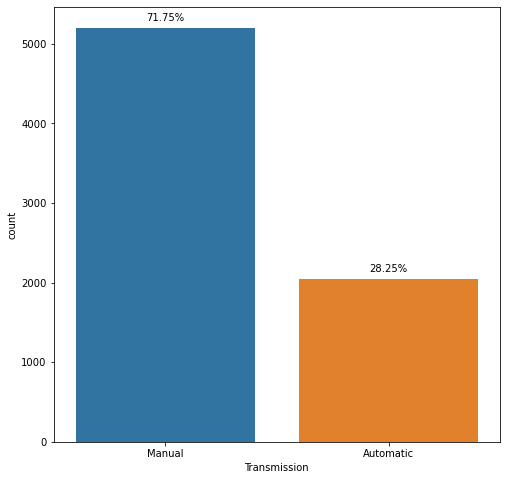

In [42]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(df_temp['Transmission'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = df_temp, x= 'Transmission') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(df_temp)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
##Maual is 71% 
print("\nManual is 71% \n")



 82% are first owners and 15% 2nd owners 



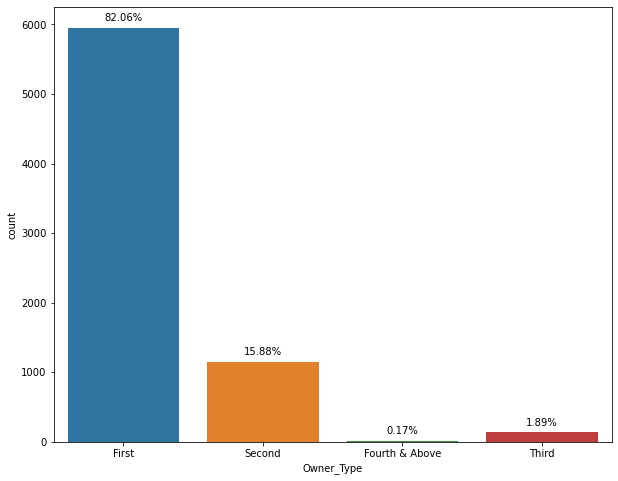

In [47]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(df_temp['Owner_Type'].unique()) + 6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = df_temp, x= 'Owner_Type') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(df_temp)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    #82% are firdt owners and 15% 2nd owners
print("\n 82% are first owners and 15% 2nd owners \n")

In [77]:
df_temp.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [90]:

dftemp2=df.copy()
dftemp2 ['Mileage']= dftemp2 ['Mileage'].replace('[k,m,p,l,/,g, ]','')
dftemp2 ['Engine']= dftemp2 ['Engine'].replace('[CC, ]','')
dftemp2 ['Power']= dftemp2 ['Power'].replace('[bhp, ]','')


dftemp2= dftemp2.astype({'Mileage':'float','Engine':'float','Power':'float','Kilometers_Driven':'float','Year':'float'})
dftemp2.describe()


df_temp ['Mileage']= df_temp ['Mileage'].str.replace('[k,m,p,l,/,g, ]','')
df_temp ['Engine']= df_temp ['Engine'].str.replace('[CC, ]','')
df_temp ['Power']= df_temp ['Power'].str.replace('[bhp, ]','')


df_temp= df_temp.astype({'Mileage':'float','Engine':'float','Power':'float','Kilometers_Driven':'float','Year':'float'})
df_temp.describe()


ValueError: could not convert string to float: '26.6 km/kg'

In [89]:
df_temp.dtypes

S.No.                  int64
Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object


 FIGURE SHOWS THAT AS MILEAGE INCREASES POWER REDUCES THOUGH THERE ARE SOME VARIATION 



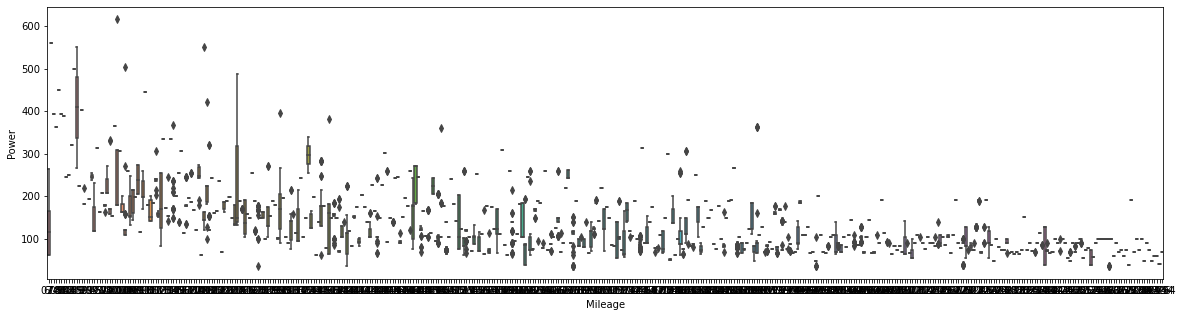

In [61]:
plt.figure(figsize=(20,5))

sns.boxplot(x="Mileage",y="Power",data=df_temp)
#this shows that sinle ppl & Male are the worst

print("\n FIGURE SHOWS THAT AS MILEAGE INCREASES POWER REDUCES THOUGH THERE ARE SOME VARIATION \n")

C:\Users\91866\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91866\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91866\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev



POWER HAS PEAK AT 100 BHP , MILEAGE HIGH RENAGE BETWEEN 15 TO 20 ,  MAXIMUM PRICE IS BETWEEN 0-20 LAKH



THERE ARE FEW OUTLIERS FOR MILEAGE BUT MORE OUTLIERS FOR POWER AND PRICE



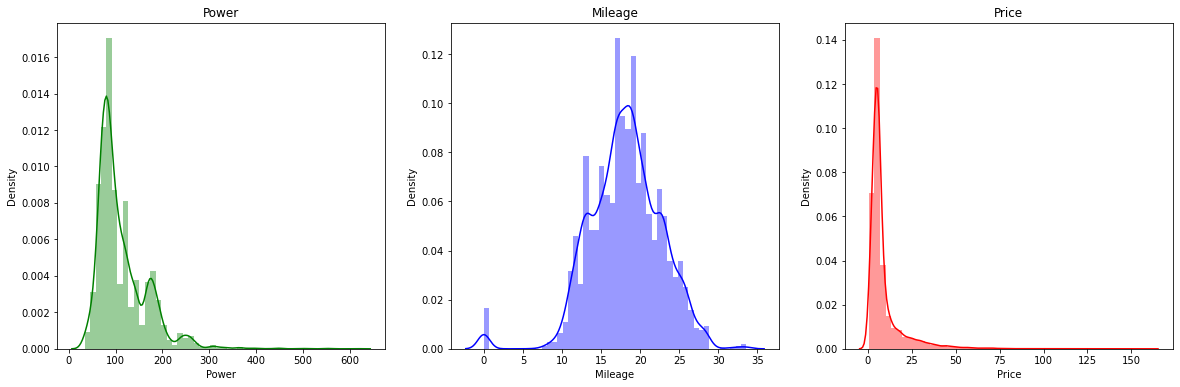

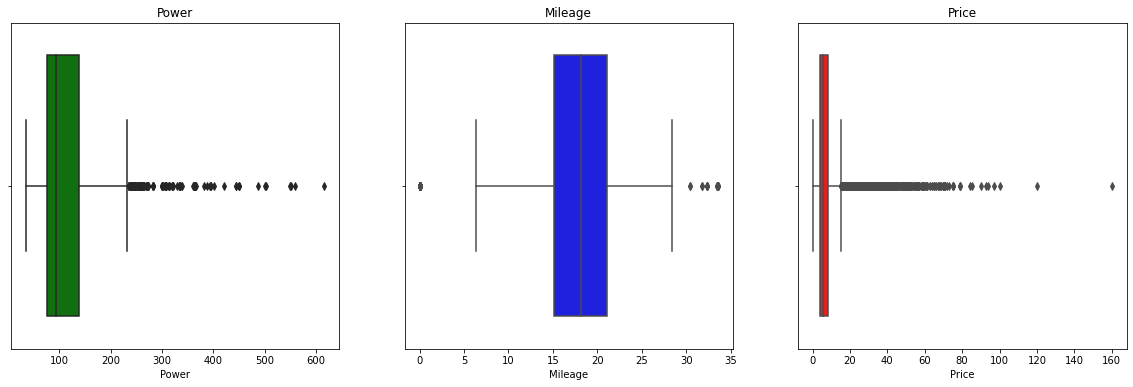

In [81]:
#POWER HAS PEAK AT 100 BHP , MILEAGE HIGH RENAGE BETWEEN 15 TO 20 ,  MAXIMUM PRICE IS BETWEEN 0-20 LAKH
#THERE ARE FEW OUTLIERS FOR MILEAGE BUT MORE OUTLIERS FOR POWER AND PRICE


plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Power')
sns.distplot(df_temp['Power'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Mileage')
sns.distplot(df_temp['Mileage'],color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('Price')
sns.distplot(df_temp['Price'],color='red')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Power')
sns.boxplot(df_temp['Power'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Mileage')
sns.boxplot(df_temp['Mileage'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Price')
sns.boxplot(df_temp['Price'],orient='vertical',color='red')

print("\n\nPOWER HAS PEAK AT 100 BHP , MILEAGE HIGH RENAGE BETWEEN 15 TO 20 ,  MAXIMUM PRICE IS BETWEEN 0-20 LAKH\n\n")
print("\nTHERE ARE FEW OUTLIERS FOR MILEAGE BUT MORE OUTLIERS FOR POWER AND PRICE\n")
plt.show()




THERE IS SIGNIFICANT DIRECT CORREALTION BETWEEN YEAR AND PRICE AND INDIRECT RELATION BETWEEN YEAR AND KILOMETERS DRIVEN 



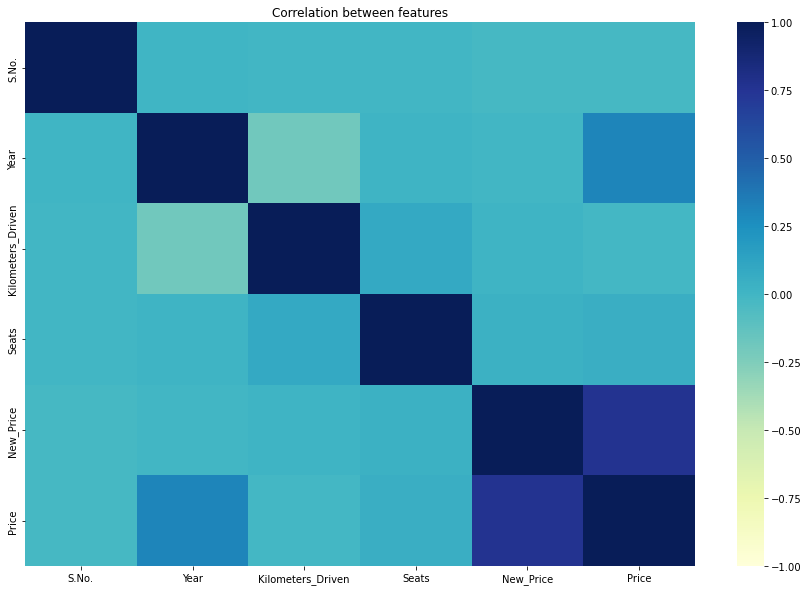

In [83]:
corr = df.corr() 
plt.figure(figsize=(15, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
print("\nTHERE IS SIGNIFICANT DIRECT CORREALTION BETWEEN YEAR AND PRICE AND INDIRECT RELATION BETWEEN YEAR AND KILOMETERS DRIVEN \n")
plt.show()



In [68]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


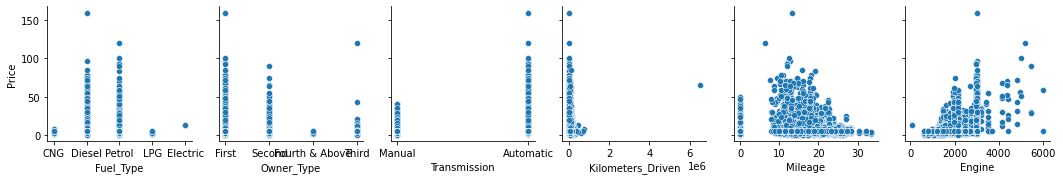

In [86]:
sns.pairplot(df_temp, y_vars='Price', x_vars=['Fuel_Type','Owner_Type',
                                                        'Transmission','Kilometers_Driven','Mileage','Engine'
                                                        ])
plt.show()

In [91]:
dftemp2=df.copy()
#dftemp2['Fuel_Type'] = dftemp2['Fuel_Type'].replace({1: 'Diesel', 2: 'CNG', 3: 'Petrol', 4: 'LPG'})
#dftemp2.head()
dftemp2 = pd.get_dummies(dftemp2, columns=['Fuel_Type','Owner_Type','Transmission','Name','Location'])
dftemp2.head(20)

#dftemp2['Fuel_Type'] = dftemp2['Fuel_Type'].replace({1: 'Diesel', 2: 'CNG', 3: 'Petrol', 4: 'LPG'})
#dftemp2.head()
df_temp = pd.get_dummies(df_temp, columns=['Fuel_Type','Owner_Type','Transmission','Name','Location'])
df_temp.head(20)

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,2010.0,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,1,...,0,0,0,0,0,0,0,0,1,0
1,1,2015.0,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,0,...,0,0,0,0,0,0,0,0,0,1
2,2,2011.0,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,0,...,0,1,0,0,0,0,0,0,0,0
3,3,2012.0,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,0,...,0,1,0,0,0,0,0,0,0,0
4,4,2013.0,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,0,...,0,0,1,0,0,0,0,0,0,0
5,5,2012.0,75000.0,21.10,814.0,55.20,5.0,10.25,2.35,0,...,0,0,0,0,1,0,0,0,0,0
6,6,2013.0,86999.0,23.08,1461.0,63.10,5.0,9.47,3.50,0,...,0,0,0,0,0,1,0,0,0,0
7,7,2016.0,36000.0,11.36,2755.0,171.50,8.0,21.00,17.50,0,...,0,0,0,0,0,0,0,0,1,0
8,8,2013.0,64430.0,20.54,1598.0,103.60,5.0,13.23,5.20,0,...,0,0,0,0,0,0,0,0,0,1
9,9,2012.0,65932.0,22.30,1248.0,74.00,5.0,7.63,1.95,0,...,0,1,0,0,0,0,0,0,0,0


In [94]:
# Log Transformation of independent variables
D4 = np.log(df_temp['Kilometers_Driven'])
D5 = np.log(df_temp['Mileage'])
D6 = np.log(df_temp['Engine'])




THERE SEEMS TO BE SLIGHT VARIATIONS IN GRAPH IN LOG AND NORAMAL VALUES



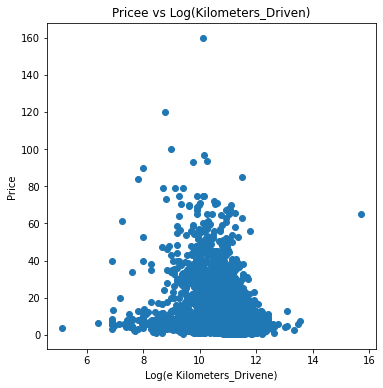

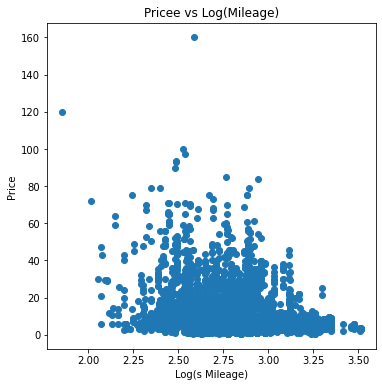

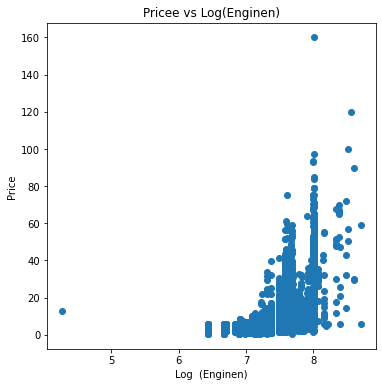

In [97]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('Pricee vs Log(Kilometers_Driven)')
plt.scatter( D4, df_temp['Price'])
plt.xlabel('Log(e Kilometers_Drivene)')
plt.ylabel('Price')


plt.figure(figsize=(20,6))
plt.subplot(1, 3, 2)
plt.title('Pricee vs Log(Mileage)')
plt.scatter( D5, df_temp['Price'])
plt.xlabel('Log(s Mileage)')
plt.ylabel('Price')


plt.figure(figsize=(20,6))
plt.subplot(1, 3, 3)
plt.title('Pricee vs Log(Enginen)')
plt.scatter( D6, df_temp['Price'])
plt.xlabel('Log  (Enginen)')
plt.ylabel('Price')


print("\nTHERE SEEMS TO BE SLIGHT VARIATIONS IN GRAPH IN LOG AND NORAMAL VALUES\n")
plt.show()



In [99]:

df_temp.drop(['S.No.','Year','Kilometers_Driven'], axis=1,inplace=True)
df_temp

,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,26.60,998.0,58.16,5.0,5.51,1.75,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,19.67,1582.0,126.20,5.0,16.06,12.50,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,18.20,1199.0,88.70,5.0,8.61,4.50,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,20.77,1248.0,88.76,7.0,11.27,6.00,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,15.20,1968.0,140.80,5.0,53.14,17.74,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,20.54,1598.0,103.60,5.0,13.23,5.64,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7249,17.21,1197.0,103.60,5.0,10.15,5.64,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7250,23.08,1461.0,63.10,5.0,9.47,5.64,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7251,17.20,1197.0,103.60,5.0,10.15,5.64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
df_temp.isna().sum()

Mileage               2
Engine               46
Power               175
Seats                 0
New_Price             0
                   ... 
Location_Jaipur       0
Location_Kochi        0
Location_Kolkata      0
Location_Mumbai       0
Location_Pune         0
Length: 2069, dtype: int64

In [106]:
df_temp = df_temp.fillna(df_temp.median())

In [107]:
df_temp.isna().sum()

Mileage             0
Engine              0
Power               0
Seats               0
New_Price           0
                   ..
Location_Jaipur     0
Location_Kochi      0
Location_Kolkata    0
Location_Mumbai     0
Location_Pune       0
Length: 2069, dtype: int64

In [108]:
X = df_temp.drop(labels= "Price" , axis = 1)
y = df_temp["Price"]
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [110]:
# Apply scaler() to all the columns except the 'dummy' variables
vars = ['Price', 'New_Price', 'Power', 'Engine','Mileage']

df_temp[vars] = scaler.fit_transform(df_temp[vars])


df_temp.head()



,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0.793083,0.156261,0.041183,5.0,0.004312,0.008210,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.586464,0.254809,0.158130,5.0,0.032741,0.075583,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.542636,0.190179,0.093675,5.0,0.012665,0.025445,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.619261,0.198448,0.093778,7.0,0.019833,0.034846,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.453190,0.319946,0.183224,5.0,0.132663,0.108423,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [388]:
df_temp.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
count,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,...,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000
mean,0.009005,0.540894,0.260511,0.134260,5.277678,0.046882,0.052559,0.008548,0.531091,0.000276,...,0.060665,0.081484,0.106439,0.090997,0.120778,0.068799,0.106439,0.090170,0.130842,0.105474
std,0.012989,0.136004,0.100148,0.090964,0.809039,0.065365,0.064511,0.092067,0.499067,0.016605,...,0.238730,0.273595,0.308420,0.287624,0.325891,0.253130,0.308420,0.286444,0.337251,0.307184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005205,0.452296,0.190010,0.073565,5.000000,0.010698,0.021371,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.008192,0.541443,0.239791,0.102784,5.000000,0.019914,0.032590,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.011205,0.629100,0.319946,0.178463,5.000000,0.047913,0.049887,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [112]:
###showing 87%  result  R-squared

print(lr_1.summary())



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     12.65
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:53:00   Log-Likelihood:                -13740.
No. Observations:                5077   AIC:                         3.099e+04
Df Residuals:                    3321   BIC:                         4.246e+04
Df Model:                        1755                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

NOW ON FOLLOWING SAME PROCEDURE FOR LOG OF PRICE

In [133]:
dftemp3=df.copy()
dftemp3

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


In [134]:
dftemp3 ['Mileage']= dftemp3 ['Mileage'].str.replace('[k,m,p,l,/,g, ]','')
dftemp3 ['Engine']= dftemp3 ['Engine'].str.replace('[CC, ]','')
dftemp3 ['Power']= dftemp3 ['Power'].str.replace('[bhp, ]','')

dftemp3= dftemp3.astype({'Mileage':'float','Engine':'float','Power':'float','Kilometers_Driven':'float','Year':'float'})


C:\Users\91866\AppData\Local\Temp\ipykernel_37392\3115631015.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dftemp3 ['Mileage']= dftemp3 ['Mileage'].str.replace('[k,m,p,l,/,g, ]','')
C:\Users\91866\AppData\Local\Temp\ipykernel_37392\3115631015.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dftemp3 ['Engine']= dftemp3 ['Engine'].str.replace('[CC, ]','')
C:\Users\91866\AppData\Local\Temp\ipykernel_37392\3115631015.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dftemp3 ['Power']= dftemp3 ['Power'].str.replace('[bhp, ]','')


In [135]:
dftemp3['price_log'] = np.log(dftemp3['Price'])
dftemp3

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,price_log
0,0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729
2,2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077
3,3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011.0,89411.0,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.23,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015.0,59000.0,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,10.15,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012.0,28000.0,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.47,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013.0,52262.0,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,10.15,NaN,NaN


In [136]:
dftemp3 = dftemp3.fillna(dftemp3.median())
dftemp3

C:\Users\91866\AppData\Local\Temp\ipykernel_37392\745283559.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dftemp3 = dftemp3.fillna(dftemp3.median())


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,price_log
0,0,Maruti Wagon R LXI CNG,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729
2,2,Honda Jazz V,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077
3,3,Maruti Ertiga VDI,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011.0,89411.0,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.23,5.64,1.729884
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015.0,59000.0,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,10.15,5.64,1.729884
7250,7250,Nissan Micra Diesel XV,Kolkata,2012.0,28000.0,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.47,5.64,1.729884
7251,7251,Volkswagen Polo GT TSI,Pune,2013.0,52262.0,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,10.15,5.64,1.729884


In [137]:
dftemp3.drop(['S.No.','Year','Kilometers_Driven','Name','Location'], axis=1,inplace=True)


In [138]:
dftemp3

,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,price_log
0,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,0.559616
1,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729
2,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077
3,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759
4,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822
...,...,...,...,...,...,...,...,...,...,...
7248,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.23,5.64,1.729884
7249,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,10.15,5.64,1.729884
7250,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.47,5.64,1.729884
7251,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,10.15,5.64,1.729884


In [139]:
dftemp3 = pd.get_dummies(dftemp3, columns=['Fuel_Type','Owner_Type','Transmission',])
dftemp3.head(20)


dftemp3.isna().sum()

X = dftemp3.drop(labels= "price_log" , axis = 1)
y = dftemp3["price_log"]
X.head()


,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Transmission_Automatic,Transmission_Manual
0,26.60,998.0,58.16,5.0,5.51,1.75,1,0,0,0,0,1,0,0,0,0,1
1,19.67,1582.0,126.20,5.0,16.06,12.50,0,1,0,0,0,1,0,0,0,0,1
2,18.20,1199.0,88.70,5.0,8.61,4.50,0,0,0,0,1,1,0,0,0,0,1
3,20.77,1248.0,88.76,7.0,11.27,6.00,0,1,0,0,0,1,0,0,0,0,1
4,15.20,1968.0,140.80,5.0,53.14,17.74,0,1,0,0,0,0,0,1,0,1,0


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables
vars = ['Price', 'New_Price', 'Power', 'Engine','Mileage','price_log']

dftemp3[vars] = scaler.fit_transform(dftemp3[vars])


In [144]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train)
lr_11 = sm.OLS(y_train, X_train_lm1).fit()

print("\n\nR-squared:                       0.795\n\n")
print(lr_11.summary())




R-squared:                       0.795


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1509.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:00:44   Log-Likelihood:                -1967.4
No. Observations:                5077   AIC:                             3963.
Df Residuals:                    5063   BIC:                             4054.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
##SO WE NO NEED TO USE LOG TRANSFORM ,
#WE DAN USE ORIGINAL DATA AND 
#THEN SIGNIFICANT VARIATION IN POWER , MILAGE FUEL TYPE AS SHOWN IN GRAPHS WITH RESPECT TO PRICE  